### Monterey Wharf 2 - Seasonal cycle

Start by importing libraries and reading data into a Pandas data frame.

In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

filename = 'data_files/Monterey_Wharf2_shorestation_hourly.csv'
df = pd.read_csv(filename,parse_dates=[0])

The `unix_time` variable is the number of seconds since Jan-1-1970. The `Date_Time` variable contains the same times in in the DateTime64 format used by Numpy and Pandas. This is useful for plotting.

In [2]:
unix_time = np.array(df['unix_time'])
Date_Time = np.array(df['Date_Time'])
Temp = np.array(df['Temp']) # Temperature

Make a preliminary plot of the time series.

<IPython.core.display.Javascript object>


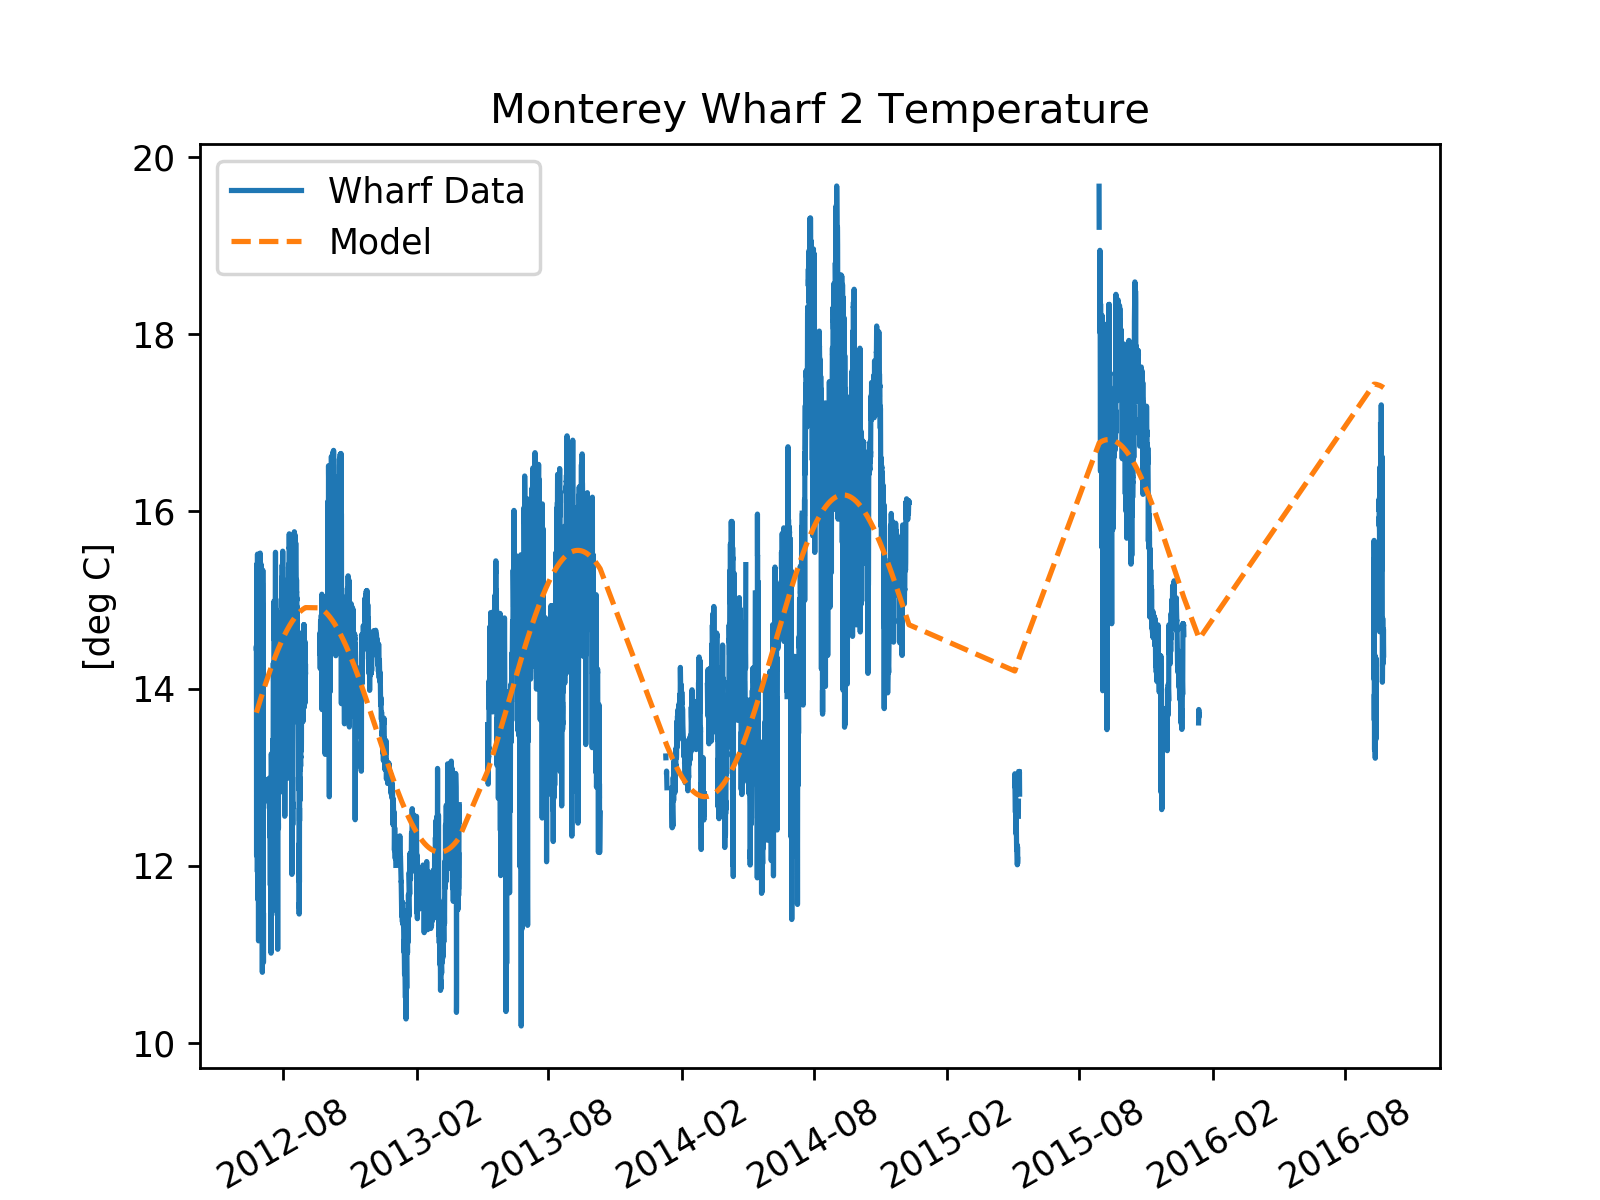

In [3]:
plt.figure()
plt.plot(Date_Time,Temp,label='Wharf Data')
plt.ylabel('[deg C]')
plt.title('Monterey Wharf 2 Temperature')
plt.xticks(rotation=30);

In [4]:
#Make sure there aren't any nans getting in the way
finite_idx = np.isfinite(Temp) #find where we have good Temp values
temp = np.array(Temp[finite_idx])
time = np.array(unix_time[finite_idx]) #use idx from temp because data must be in pairs (assuming all unix time is good)
date_time2 = np.array(Date_Time[finite_idx]) #get the matching date time values as well for plotting later

In [5]:
#import my function
from mytools import harmonic

#find coefficients for fit using my seasonal_fit func
c = harmonic.seasonal_fit(time,temp,31536000)
print('Coefficients for fit:', c)

#put coefficients into fit eq. 
t_annual = 31536000 #seconds in a year (unix doesn't count leap years?)
fit_temp = c[0] + c[1]*time + c[2]*np.sin(2*np.pi*time/t_annual) + c[3]*np.cos(2*np.pi*time/t_annual)

#did it work?
plt.plot(date_time2,fit_temp,'--',label='Model')
plt.legend();

Coefficients for fit: [ -1.33107719e+01   1.98224218e-08  -1.49962670e+00  -3.63135565e-01]


<IPython.core.display.Javascript object>


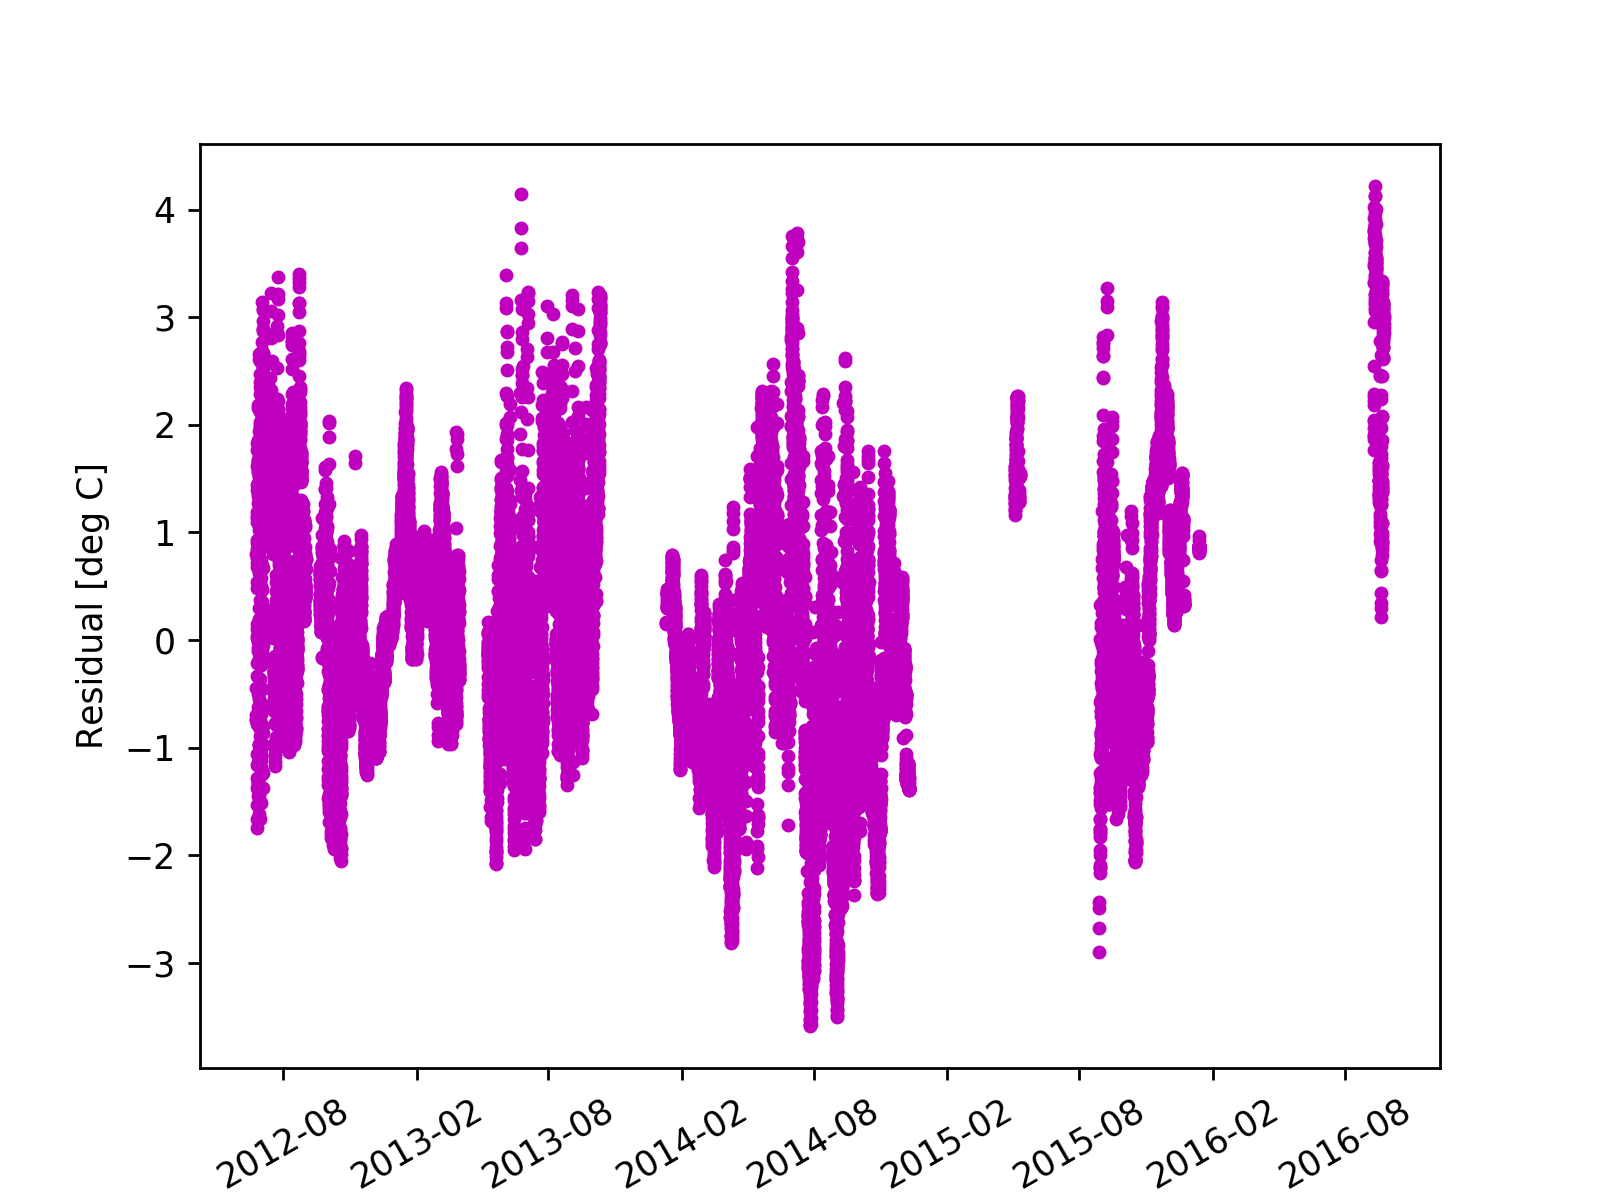

In [14]:
#find the residuals and plot
residuals = fit_temp-temp
plt.figure()
plt.plot(date_time2,residuals,'m.')
plt.ylabel('Residual [deg C]') #when +, model > mdata
plt.xlabel('Unix Time')
plt.xticks(rotation=30);

Comment on how well the model matches the data, and how the estimate of the seasonal cycle could be improved:

The maximum deviation the residuals have from the mean is about 4 degrees celsius, which is potentially significant depending on the questions you're asking and what temporal scale they are on. Where there are data points the model seems to go through the data very well and shows typical values of what would be expected during those times. The residuals as a whole are centered around between a -1, 1 degree celsius range which I think is pretty good considering the variation in the data. 

The estimate of the seasonal cycle could be improved by 1) increasing the number of data points - where there is no data the model is just drawn between the surrounding points since there is nothing to go by 2) reporting the range of possible values associated with each model point prediction could bring more awareness to the spread of the data and that not all temperatures fall exactly on the model line.